In [ ]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import glob
from tqdm import tqdm
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split


## Loading Data


In [ ]:
# For colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## To unzip images

# path_to_zip = "drive/MyDrive/img_align_celeba.zip"
# directory_to_extract_to = "drive/MyDrive/img_align_celeba"

# import zipfile
# with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [ ]:
images = glob.glob('drive/MyDrive/img_align_celeba/img_align_celeba/*.jpg')
len(images)

20661

In [ ]:
# Not sure if Colab messages up the order of the images or not, so just in case
print(images.sort())

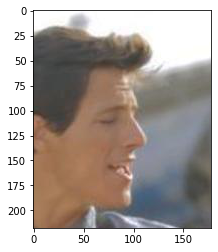

In [ ]:
plt.imshow(mpimg.imread(images[2]))

In [ ]:
x = []
size = 128
for i in tqdm(images[0:]):
  img = image.load_img(i, target_size=(size,size,3))
  img = image.img_to_array(img)
  x.append(img)

100%|██████████| 20661/20661 [01:09<00:00, 297.70it/s]


In [ ]:
import csv 

save_path = "drive/MyDrive/input.csv"

In [ ]:
# # Convert input into a csv for later use (just so it's faster to load images)

# with open(save_path, 'w') as f:
#   writer = csv.writer(f, delimiter=',')

#   for i, img in enumerate(x):
#     np_img = np.array(img)
#     reshaped_img = np_img.reshape(1, -1)
#     writer.writerow(reshaped_img[0])

#     if i % 5000 == 0:
#       print(i, end=' ') 

0 5000 10000 15000 20000 

In [ ]:
# Load image data from csv to numpy array

size = 6000
x = np.zeros((size, 128, 128, 3)) # CNN requires input shape to be (#samples, width, height, channels)

with open(save_path, 'r') as f:
  for i, img in enumerate(f):
    vals = np.array([float(i) for i in img.split(",")])
    vals = vals.reshape(128, 128, 3)
    x[i,:,:,:] = vals
    # x.append(vals)

    if i % 5000 == 0:
      print(i, end=' ') 

    if i == size - 1:
      break

    # plt.imshow(vals.astype(np.uint8))
    # plt.show()

0 5000 

In [ ]:
## Convert list_attr_celeba.txt to csv file

# import csv 

# txt_file = "drive/MyDrive/list_attr_celeba.txt"
# csv_file = "drive/MyDrive/list_attr_celeba1.csv"

# with open(txt_file, 'r') as infile, open(csv_file, 'w') as outfile:
#   writer = csv.writer(outfile)

#   for i, line in enumerate(infile):
#     if 0 < i < 20664: 
#       attr = line.split(' ')
#       while '' in attr: attr.remove('')
#       attr[-1] = attr[-1].replace("\n", '')

#       if i == 1: attr.insert(0, 'img_num'); attr.pop()

#       writer.writerows([attr])

#       if i < 10: print(attr)

['img_num', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
['000001.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '1', '-1', '-1', '1']
['000002.jpg', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '-1', '-1', '1', '-1

In [ ]:
print(attr)

['202599.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1\n']


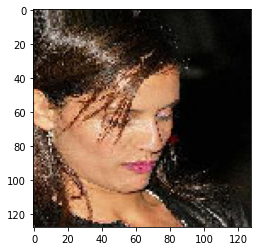

In [ ]:
plt.imshow(x[3].astype(np.uint8))
plt.show()

In [ ]:
csv_file = "drive/MyDrive/list_attr_celeba1.csv"
data = pd.read_csv(csv_file)

In [ ]:
# Replace -1's to 0's so "Binary_Crossentropy" can be used

data = data.replace(-1, 0)

In [ ]:
print(data)

          img_num  5_o_Clock_Shadow  ...  Wearing_Necktie  Young
0      000001.jpg                 0  ...                0      1
1      000002.jpg                 0  ...                0      1
2      000003.jpg                 0  ...                0      1
3      000004.jpg                 0  ...                0      1
4      000005.jpg                 0  ...                0      1
...           ...               ...  ...              ...    ...
20657  020658.jpg                 0  ...                0      1
20658  020659.jpg                 0  ...                0      1
20659  020660.jpg                 0  ...                0      1
20660  020661.jpg                 1  ...                0      1
20661  020662.jpg                 0  ...                0      1

[20662 rows x 41 columns]


## Shuffle/Split Data

In [ ]:
idx = np.random.choice(np.arange(len(x)), 3000, replace=False)
x_shuffled = x[idx]
y_shuffled = data.iloc[idx]

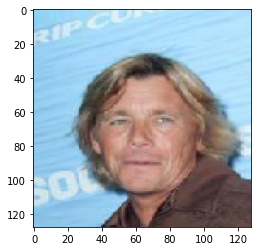

img_num                001846.jpg
5_o_Clock_Shadow                0
Arched_Eyebrows                 0
Attractive                      0
Bags_Under_Eyes                 1
Bald                            0
Bangs                           0
Big_Lips                        0
Big_Nose                        1
Black_Hair                      0
Blond_Hair                      0
Blurry                          0
Brown_Hair                      0
Bushy_Eyebrows                  0
Chubby                          0
Double_Chin                     0
Eyeglasses                      0
Goatee                          0
Gray_Hair                       1
Heavy_Makeup                    0
High_Cheekbones                 0
Male                            1
Mouth_Slightly_Open             0
Mustache                        0
Narrow_Eyes                     0
No_Beard                        1
Oval_Face                       0
Pale_Skin                       0
Pointy_Nose                     0
Receding_Hairl

In [ ]:
i = 0
plt.imshow(x_shuffled[i].astype(np.uint8))
plt.show()

print(y_shuffled.iloc[0])

## CNN for Binary Classification of one attribute. Black Hair was chosen for this. Only first 3000 samples were used to train/test.

In [ ]:
# Creates the convolutional neural network
def create_model():
    model = keras.models.Sequential()

    # First layer of CNN with input layer
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Second layer of CNN
    model.add(keras.layers.Conv2D(64, (3, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Third layer of CNN
    model.add(keras.layers.Conv2D(128, (3, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Flatten the output and create fully connected layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256))

    # Output layer with 1 different class
    model.add(keras.layers.Dense(1))
    model.add(keras.layers.Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model


In [ ]:
x_data = x_shuffled
y_data = y_shuffled

In [ ]:
print(type(x_data))

<class 'numpy.ndarray'>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.Black_Hair, test_size=0.2, random_state = 1)

In [ ]:
# # If data was loaded directly into x using the 
# # '''for i in tqdm(images[0:]):''' code,
# # we have to reshape for CNN input since 
# # it wants data in the shape of (#samples, width, height, channels)

# x_train = np.array(x_train)
# x_test = np.array(x_test)

# x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
# x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)

In [ ]:
model = create_model()
history = model.fit(x_train, y_train, epochs=12)

print('Model evaluation ', model.evaluate(x_test, y_test))

Epoch 1/12
75/75 [==============================] - 3s 17ms/step - loss: 172.5541 - accuracy: 0.6706
Epoch 2/12
75/75 [==============================] - 1s 17ms/step - loss: 0.3859 - accuracy: 0.8191
Epoch 3/12
75/75 [==============================] - 1s 17ms/step - loss: 0.3146 - accuracy: 0.8563
Epoch 4/12
75/75 [==============================] - 1s 17ms/step - loss: 0.2661 - accuracy: 0.8877
Epoch 5/12
75/75 [==============================] - 1s 17ms/step - loss: 0.2376 - accuracy: 0.8954
Epoch 6/12
75/75 [==============================] - 1s 17ms/step - loss: 0.1769 - accuracy: 0.9343
Epoch 7/12
75/75 [==============================] - 1s 17ms/step - loss: 0.1827 - accuracy: 0.9301
Epoch 8/12
75/75 [==============================] - 1s 17ms/step - loss: 0.1532 - accuracy: 0.9452
Epoch 9/12
75/75 [==============================] - 1s 17ms/step - loss: 0.1171 - accuracy: 0.9584
Epoch 10/12
75/75 [==============================] - 1s 17ms/step - loss: 0.1088 - accuracy: 0.9624
Epoch 1

[[0.4907491]]
0


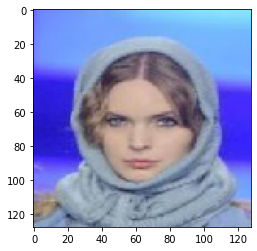

In [ ]:
i = 22

test = x_test[i].reshape(1, 128, 128, 3)
print(model.predict(test))
print(y_test.iloc[i])
plt.imshow(x_test[i].astype(np.uint8))
plt.show()

## CNN for multilabel classication. Heavy_Makeup, High_Cheekbones, Male, and Mouth_Slightly_Open were used. Only first 3000 samples were used to train/test 

In [ ]:
# Creates the convolutional neural network
def create_multi_label_model():
    model = keras.models.Sequential()

    # First layer of CNN with input layer
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Second layer of CNN
    model.add(keras.layers.Conv2D(64, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Third layer of CNN
    model.add(keras.layers.Conv2D(128, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Fourth layer of CNN
    model.add(keras.layers.Conv2D(256, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Flatten the output and create fully connected layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512))
    model.add(keras.layers.Dense(1024))

    # Output layer with 1 different class
    model.add(keras.layers.Dense(4))
    model.add(keras.layers.Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
x_data = x_shuffled/255 # Testing out data normalization
y_data = y_shuffled.iloc[:,19:23]

In [ ]:
print(y_data)

      Heavy_Makeup  High_Cheekbones  Male  Mouth_Slightly_Open
4947             0                1     1                    0
1122             0                1     1                    0
1436             0                0     0                    0
4483             1                0     0                    0
1730             1                0     0                    0
...            ...              ...   ...                  ...
3693             0                0     1                    1
2934             0                0     1                    0
293              0                0     1                    0
1444             0                0     1                    0
3928             1                1     0                    1

[3000 rows x 4 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 1)

In [ ]:
model = create_multi_label_model()
history = model.fit(x_train, y_train, epochs=60)

y_predict = model.predict(x_test)
y_predict = y_predict.round()


Epoch 1/60
75/75 [==============================] - 2s 20ms/step - loss: 0.7895 - accuracy: 0.1752
Epoch 2/60
75/75 [==============================] - 2s 20ms/step - loss: 0.6062 - accuracy: 0.4171
Epoch 3/60
75/75 [==============================] - 1s 20ms/step - loss: 0.5522 - accuracy: 0.5027
Epoch 4/60
75/75 [==============================] - 1s 20ms/step - loss: 0.5032 - accuracy: 0.5361
Epoch 5/60
75/75 [==============================] - 1s 20ms/step - loss: 0.4527 - accuracy: 0.5442
Epoch 6/60
75/75 [==============================] - 1s 20ms/step - loss: 0.3670 - accuracy: 0.5471
Epoch 7/60
75/75 [==============================] - 2s 20ms/step - loss: 0.3047 - accuracy: 0.5094
Epoch 8/60
75/75 [==============================] - 1s 20ms/step - loss: 0.2757 - accuracy: 0.5051
Epoch 9/60
75/75 [==============================] - 1s 20ms/step - loss: 0.2315 - accuracy: 0.5386
Epoch 10/60
75/75 [==============================] - 1s 20ms/step - loss: 0.1855 - accuracy: 0.4961
Epoch 11/

In [ ]:
i = 1

from sklearn.metrics import accuracy_score
print(y_test.iloc[i])
print(y_predict[i])
acc = accuracy_score(y_test, y_predict)
print(acc)

Heavy_Makeup           0
High_Cheekbones        1
Male                   1
Mouth_Slightly_Open    1
Name: 2187, dtype: int64
[0. 0. 1. 1.]
0.54


## Visualize Data (Just a count of labels per attribute)

In [ ]:
sums = data[:20661].sum(axis = 0, skipna = True)

In [ ]:
pos = [sums[i] for i in range(1, len(sums))]

In [ ]:
negs = [20661 - pos[i] for i in range(len(pos))]

In [ ]:
categories = list(data.columns.values)[1:]

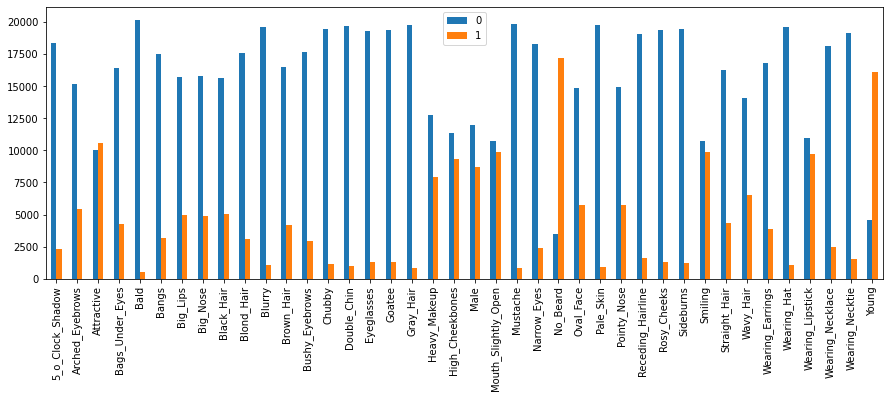

In [ ]:
df = pd.DataFrame(np.c_[negs, pos], index=categories)
df.plot.bar(figsize=(15, 5))

plt.show()

## Transfer Learning

In [ ]:
x_data = x_shuffled
y_data = y_shuffled

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.Black_Hair, test_size=0.2, random_state = 1)

### Trying VGGnet

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
# load model without classifier layers
model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# add new classifier layers
flat1 = keras.layers.Flatten()(model.layers[-1].output)
X = keras.layers.Dense(1024, activation='relu')(flat1)
output = keras.layers.Dense(1, activation='sigmoid')(X)
# define new model
model = keras.models.Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
history = model.fit(x_train, y_train, epochs=40)

print('Model evaluation ', model.evaluate(x_test, y_test))

Epoch 1/40
75/75 [==============================] - 21s 260ms/step - loss: 14.2870 - accuracy: 0.6673
Epoch 2/40
75/75 [==============================] - 19s 259ms/step - loss: 0.5375 - accuracy: 0.7734
Epoch 3/40
75/75 [==============================] - 19s 259ms/step - loss: 0.5647 - accuracy: 0.7543
Epoch 4/40
75/75 [==============================] - 20s 261ms/step - loss: 0.5588 - accuracy: 0.7610
Epoch 5/40
75/75 [==============================] - 20s 261ms/step - loss: 0.5714 - accuracy: 0.7418
Epoch 6/40
75/75 [==============================] - 20s 261ms/step - loss: 0.5390 - accuracy: 0.7701
Epoch 7/40
75/75 [==============================] - 20s 260ms/step - loss: 0.5366 - accuracy: 0.7555
Epoch 8/40
75/75 [==============================] - 19s 260ms/step - loss: 0.5185 - accuracy: 0.7547
Epoch 9/40
75/75 [==============================] - 20s 260ms/step - loss: 0.4854 - accuracy: 0.7685
Epoch 10/40
75/75 [==============================] - 20s 261ms/step - loss: 0.4396 - accur

### Trying ResNet50

In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
# load model without classifier layers
model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# add new classifier layers
flat1 = keras.layers.Flatten()(model.layers[-1].output)
X = keras.layers.Dense(1024, activation='relu')(flat1)
output = keras.layers.Dense(1, activation='sigmoid')(X)
# define new model
model = keras.models.Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
history = model.fit(x_train, y_train, epochs=25)

print('Model evaluation ', model.evaluate(x_test, y_test))

Epoch 1/25
75/75 [==============================] - 26s 271ms/step - loss: 3.6271 - accuracy: 0.7591
Epoch 2/25
75/75 [==============================] - 20s 270ms/step - loss: 0.2936 - accuracy: 0.8821
Epoch 3/25
75/75 [==============================] - 20s 270ms/step - loss: 0.2046 - accuracy: 0.9229
Epoch 4/25
75/75 [==============================] - 20s 271ms/step - loss: 0.1509 - accuracy: 0.9497
Epoch 5/25
75/75 [==============================] - 20s 269ms/step - loss: 0.1211 - accuracy: 0.9534
Epoch 6/25
75/75 [==============================] - 20s 270ms/step - loss: 0.0911 - accuracy: 0.9682
Epoch 7/25
75/75 [==============================] - 20s 270ms/step - loss: 1.4201 - accuracy: 0.8182
Epoch 8/25
75/75 [==============================] - 20s 269ms/step - loss: 0.4894 - accuracy: 0.7692
Epoch 9/25
75/75 [==============================] - 20s 270ms/step - loss: 0.4557 - accuracy: 0.7853
Epoch 10/25
75/75 [==============================] - 20s 270ms/step - loss: 0.3906 - accura

[[0.95930105]]
1


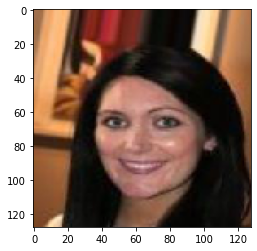

In [ ]:
i = 3

test = x_test[i].reshape(1, 128, 128, 3)
print(model.predict(test))
print(y_test.iloc[i])
plt.imshow(x_test[i].astype(np.uint8))
plt.show()